# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
data.sort_values(by=['Direct_Bilirubin'], inplace=True)

db = data['Direct_Bilirubin']
tb = data['Total_Bilirubin']



In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    db,
    tb,
    test_size = 0.2,
    random_state = 42
)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [5]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
model.score(X_test, y_test)

0.9430572779725597

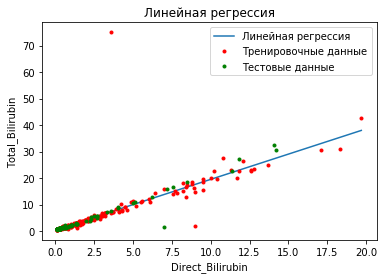

In [7]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train), max(X_train), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.9396246797134117

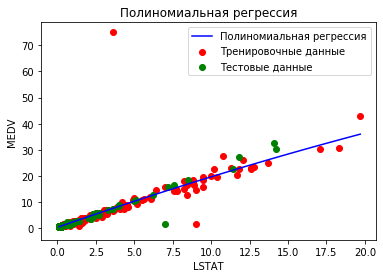

In [9]:
def viz_polymonial():
    plt.scatter(X_train, y_train, c='red')
    plt.scatter(X_test, y_test, c='green')
    x = np.linspace(min(X_test), max(X_train), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [10]:
fl = data[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]


In [11]:
ds = data['Dataset']
#X = data.drop('target', axis=1)
#y = data.target


In [12]:
fl.fillna(0,inplace=True)
ds.fillna(0,inplace=True)

C:\Users\pgridchina\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    fl,
    ds,
    test_size = 0.25,
    random_state = 42
)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [15]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.67      0.95      0.78        93
           2       0.64      0.17      0.27        53

    accuracy                           0.66       146
   macro avg       0.65      0.56      0.53       146
weighted avg       0.66      0.66      0.60       146



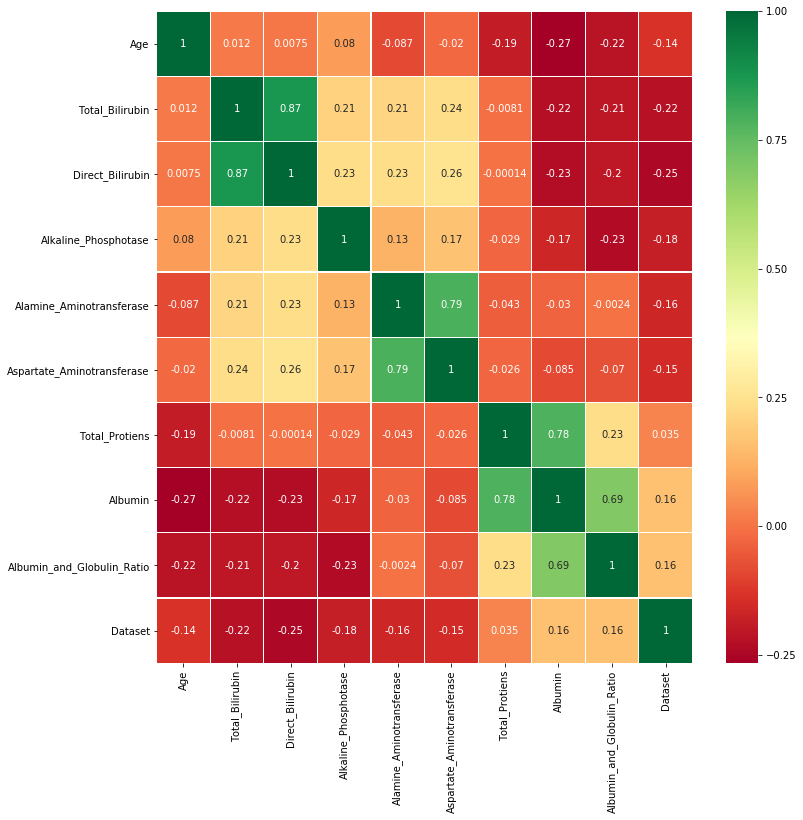

In [16]:
import seaborn as sns

sns.heatmap(data.corr(),cmap='RdYlGn',annot=True,linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [17]:
# Больше 0.5 нет, возьмем хоть что-то

In [22]:
fl = data[['Total_Bilirubin','Direct_Bilirubin','Albumin']]
ds = data['Dataset']

In [23]:
fl.fillna(0,inplace=True)
ds.fillna(0,inplace=True)

C:\Users\pgridchina\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    fl,
    ds,
    test_size = 0.25,
    random_state = 42
)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [25]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.64      1.00      0.78        93
           2       0.00      0.00      0.00        53

    accuracy                           0.64       146
   macro avg       0.32      0.50      0.39       146
weighted avg       0.41      0.64      0.50       146



C:\Users\pgridchina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Совсем плохо стало. Больные не нашлись ((

Посчитать квартили для всех колонок. 

In [86]:
data.quantile(.25)


Age                            33.0
Total_Bilirubin                 0.8
Direct_Bilirubin                0.2
Alkaline_Phosphotase          175.5
Alamine_Aminotransferase       23.0
Aspartate_Aminotransferase     25.0
Total_Protiens                  5.8
Albumin                         2.6
Albumin_and_Globulin_Ratio      0.7
Dataset                         1.0
Name: 0.25, dtype: float64

In [89]:
data.quantile(.5)


Age                            45.00
Total_Bilirubin                 1.00
Direct_Bilirubin                0.30
Alkaline_Phosphotase          208.00
Alamine_Aminotransferase       35.00
Aspartate_Aminotransferase     42.00
Total_Protiens                  6.60
Albumin                         3.10
Albumin_and_Globulin_Ratio      0.93
Dataset                         1.00
Name: 0.5, dtype: float64

In [90]:
data.quantile(.75)

Age                            58.0
Total_Bilirubin                 2.6
Direct_Bilirubin                1.3
Alkaline_Phosphotase          298.0
Alamine_Aminotransferase       60.5
Aspartate_Aminotransferase     87.0
Total_Protiens                  7.2
Albumin                         3.8
Albumin_and_Globulin_Ratio      1.1
Dataset                         2.0
Name: 0.75, dtype: float64

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

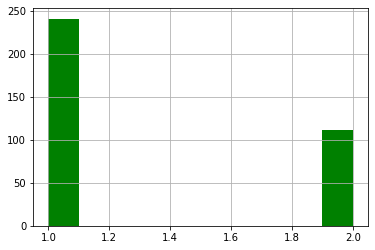

Среднее 
 1.3172804532577904
Квартиль 
 1.0


In [34]:
data1 = data[data['Age']<50]
n, bins, patches = plt.hist(data1['Dataset'], facecolor='g')


plt.grid(True)
plt.show()
print('Среднее \n',data1['Dataset'].mean())
print('Квартиль \n',data1['Dataset'].quantile(.5))

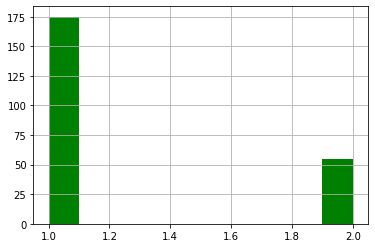

Среднее 
 1.2391304347826086
Квартиль 
 1.0


In [35]:
data2 = data[data['Age']>=50]
n, bins, patches = plt.hist(data2['Dataset'], facecolor='g')


plt.grid(True)
plt.show()
print('Среднее \n',data2['Dataset'].mean())
print('Квартиль \n',data2['Dataset'].quantile(.5))


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [36]:
data3 = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(data3, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

pvalue меньше, чем 0.05. Это говорит о том, что выборка не похожа на генеральную совокупность

In [37]:
data4 = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(data3, data4)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

pvalue стремится к 0. это говорит о том, что выборки различны

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [56]:
data5 = data[data['Age']<=30]['Dataset']
data6 = data[(data['Age']>30) & (data['Age']<=55)]['Dataset']
data7 = data[data['Age']>55]['Dataset']

stats.f_oneway(data5, data6, data7)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

Вопросы задавать на почту yustiks@gmail.com